## Initial git repos
https://github.com/grace-shearrer/insulinBrain
https://github.com/grace-shearrer/multilayer_analysis

# Import libraries 

In [1]:
import os
import pandas as pd
%matplotlib inline

import os
import glob
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, isfc, isps, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state
from scipy.stats import ttest_1samp
from scipy.signal import hilbert
import networkx as nx
from IPython.display import HTML

# import nest_asyncio
# nest_asyncio.apply()


/Users/gracer/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## Where does this file live
/Users/gracer/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofWyoming/M2AENAD Lab - Documents/RESEARCH/BBC/scripts

## Where does the data live
/Users/gracer/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofWyoming/M2AENAD Lab - Documents/RESEARCH/BBC/data

In [2]:
basepath = '/Users/gracer/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofWyoming/M2AENAD Lab - Documents/RESEARCH/BBC/data'

In [3]:
os.path.exists(basepath)

True

In [4]:
subdirs = ['base','clamp']

In [5]:
for dirs in subdirs:
    print(os.path.exists(os.path.join(basepath, dirs)))

True
True


# Load in the data with Pandas

In [6]:
df = pd.read_csv(os.path.join(basepath,subdirs[0],'20002','total_ts.csv'))

In [7]:
df

,time,Pu,Ca,NAC,EXA,GPe,GPi,SNc,RN,SNr,PBP,VTA,VeP,HN,HTH,MN,STH,dlPFC,Viz,Hippo
0,1970-01-01 00:00:00,-0.815184,-0.694587,-0.651746,-0.538275,0.376784,1.051952,0.982755,0.597301,0.0,0.0,0.0,0.451892,0.005192,-0.062827,0.195039,0.157665,-0.289366,-0.390427,-0.109460
1,1970-01-01 00:01:00,-0.549698,-0.631830,-0.188650,-0.407033,0.305857,0.601539,0.609748,0.291595,0.0,0.0,0.0,0.324199,-0.311288,-0.285318,-0.202088,-0.033696,0.459897,-0.501772,-0.456159
2,1970-01-01 00:02:00,-0.087650,-0.149015,0.044703,0.046025,0.292714,0.272841,-0.073739,0.028116,0.0,0.0,0.0,0.153941,0.413154,-0.321761,-0.183921,0.128025,0.121206,-0.243668,-0.014110
3,1970-01-01 00:03:00,-0.423381,-0.631088,-0.348760,-0.421056,-0.237031,0.006866,-0.181544,-0.121712,0.0,0.0,0.0,-0.397623,-0.444802,-0.346034,-0.142501,-0.163697,0.551095,-0.283964,-0.771133
4,1970-01-01 00:04:00,0.162000,0.003651,0.333366,0.262486,0.261298,0.326918,0.286331,0.021369,0.0,0.0,0.0,0.260352,-0.113488,0.078507,-0.201724,0.187305,0.271108,0.011371,-0.063182
5,1970-01-01 00:05:00,0.307607,0.068437,0.373889,-0.068678,0.020468,-0.037040,-0.149203,-0.449986,0.0,0.0,0.0,0.192959,-0.175300,0.356335,0.394874,-0.131457,0.146482,0.271504,-0.166576
6,1970-01-01 00:06:00,0.257239,0.268054,0.215642,0.097803,-0.080191,-0.201135,-0.123329,-0.408806,0.0,0.0,0.0,0.012060,-0.207443,0.141711,-0.193368,-0.121057,-0.106766,0.004657,0.189896
7,1970-01-01 00:07:00,0.288180,0.639721,0.322421,0.283700,-0.071856,-0.158077,0.023286,-0.290153,0.0,0.0,0.0,0.159262,0.207937,0.376305,-0.026233,0.179505,0.032040,0.576127,0.559880
8,1970-01-01 00:08:00,0.438539,0.672938,-0.034479,0.449462,-0.352436,-0.824287,-0.614922,0.362206,0.0,0.0,0.0,-0.546598,0.682657,0.180911,0.388334,0.025064,-0.543779,0.337020,0.656441
9,1970-01-01 00:09:00,0.422347,0.453719,-0.066384,0.295566,-0.515607,-1.039577,-0.759382,-0.029931,0.0,0.0,0.0,-0.610445,-0.056620,-0.117828,-0.028413,-0.227657,-0.641918,0.219151,0.174404


# What do we want to do with the data



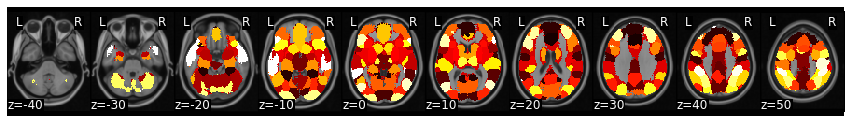

In [8]:
mask = Brain_Data('http://neurovault.org/media/images/2099/Neurosynth%20Parcellation_0.nii.gz')
mask_x = expand_mask(mask)

mask.plot()

In [ ]:
def get_subject_roi(data, roi):
    sub_rois = {}
    for sub in data:
        sub_rois[sub] = data[sub].iloc[:, roi]
    return pd.DataFrame(sub_rois)


In [23]:
df

,time,Pu,Ca,NAC,EXA,GPe,GPi,SNc,RN,SNr,PBP,VTA,VeP,HN,HTH,MN,STH,dlPFC,Viz,Hippo
0,1970-01-01 00:00:00,-0.815184,-0.694587,-0.651746,-0.538275,0.376784,1.051952,0.982755,0.597301,0.0,0.0,0.0,0.451892,0.005192,-0.062827,0.195039,0.157665,-0.289366,-0.390427,-0.109460
1,1970-01-01 00:01:00,-0.549698,-0.631830,-0.188650,-0.407033,0.305857,0.601539,0.609748,0.291595,0.0,0.0,0.0,0.324199,-0.311288,-0.285318,-0.202088,-0.033696,0.459897,-0.501772,-0.456159
2,1970-01-01 00:02:00,-0.087650,-0.149015,0.044703,0.046025,0.292714,0.272841,-0.073739,0.028116,0.0,0.0,0.0,0.153941,0.413154,-0.321761,-0.183921,0.128025,0.121206,-0.243668,-0.014110
3,1970-01-01 00:03:00,-0.423381,-0.631088,-0.348760,-0.421056,-0.237031,0.006866,-0.181544,-0.121712,0.0,0.0,0.0,-0.397623,-0.444802,-0.346034,-0.142501,-0.163697,0.551095,-0.283964,-0.771133
4,1970-01-01 00:04:00,0.162000,0.003651,0.333366,0.262486,0.261298,0.326918,0.286331,0.021369,0.0,0.0,0.0,0.260352,-0.113488,0.078507,-0.201724,0.187305,0.271108,0.011371,-0.063182
5,1970-01-01 00:05:00,0.307607,0.068437,0.373889,-0.068678,0.020468,-0.037040,-0.149203,-0.449986,0.0,0.0,0.0,0.192959,-0.175300,0.356335,0.394874,-0.131457,0.146482,0.271504,-0.166576
6,1970-01-01 00:06:00,0.257239,0.268054,0.215642,0.097803,-0.080191,-0.201135,-0.123329,-0.408806,0.0,0.0,0.0,0.012060,-0.207443,0.141711,-0.193368,-0.121057,-0.106766,0.004657,0.189896
7,1970-01-01 00:07:00,0.288180,0.639721,0.322421,0.283700,-0.071856,-0.158077,0.023286,-0.290153,0.0,0.0,0.0,0.159262,0.207937,0.376305,-0.026233,0.179505,0.032040,0.576127,0.559880
8,1970-01-01 00:08:00,0.438539,0.672938,-0.034479,0.449462,-0.352436,-0.824287,-0.614922,0.362206,0.0,0.0,0.0,-0.546598,0.682657,0.180911,0.388334,0.025064,-0.543779,0.337020,0.656441
9,1970-01-01 00:09:00,0.422347,0.453719,-0.066384,0.295566,-0.515607,-1.039577,-0.759382,-0.029931,0.0,0.0,0.0,-0.610445,-0.056620,-0.117828,-0.028413,-0.227657,-0.641918,0.219151,0.174404


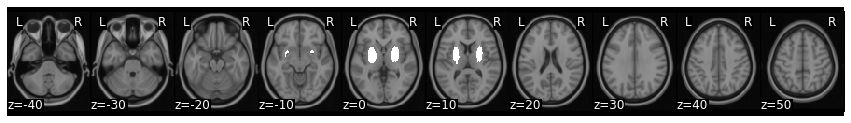

In [10]:
roi = 17

mask_x[roi].plot()


In [13]:
sub_rois = {}
for x in df:
    print(x)
    sub_rois[x] = df[x]

time
Pu
Ca
NAC
EXA
GPe
GPi
SNc
RN
SNr
PBP
VTA
VeP
HN
HTH
MN
STH
dlPFC
Viz
Hippo


In [25]:
sub_df = df[['Pu','Ca','NAC']]

In [26]:
stats_phase = isc(sub_df, method='phase_randomize', n_bootstraps=5, return_bootstraps=True)


/Users/gracer/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/gracer/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/gracer/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nile

In [29]:
stats_phase.keys()

dict_keys(['isc', 'p', 'ci', 'null_distribution'])

# Read in all the data select the Putamen column and create a dataframe of just Putamen data, run the circle shift